<a href="https://colab.research.google.com/github/voird/C-/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%84%D0%B0%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2%2C_%D0%BE%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D1%8F%D1%8E%D1%89%D0%B8%D1%85_%D1%80%D0%B5%D0%B7%D1%83%D0%BB%D1%8C%D1%82%D0%B0%D1%82%D1%8B_%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2_%D1%81%D1%82%D1%83%D0%B4%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%A1%D1%82%D0%BE%D1%80%D0%BE%D0%B6%D0%B5%D0%B2%D0%B0_%D0%9F%D0%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Работа выполнена Сторожевой Полиной Антоновной.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Чтение данных

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')


## Первые 5 записей

In [ ]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape

(1000, 8)

## Очистка данных

1. Проверка пропущенных значений
2. Проверка дубликатов
3. Проверка типа данных
4. Проверка количества уникальных значений в каждом столбце
5. Проверка статистики набора данных
6. Проверка различных категорий в категориальных столбцах

In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

В датасете отсутствуют пропущенные значения

In [ ]:
df.duplicated().sum()

0

Дубликаты отсутствуют

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## Статистика набора данных

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


1. Из вышеописанных числовых данных все средние значения очень близки друг к другу — от 66 до 68,05.
2. Все стандартные отклонения также близки — от 14,6 до 15,19.
3. Хотя для математики минимальный балл равен 0, для письма минимальный балл значительно выше — 10, а для чтения минимальный балл еще выше — 17.

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for column in columns:
    print(f"Категории в переменной '{column}': {df[column].unique()}")


Категории в переменной 'gender': ['female' 'male']
Категории в переменной 'race/ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']
Категории в переменной 'parental level of education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Категории в переменной 'lunch': ['standard' 'free/reduced']
Категории в переменной 'test preparation course': ['none' 'completed']


In [ ]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('У нас есть {} числовых признаков: {}'.format(len(numeric_features), numeric_features))
print('\nУ нас есть {} категориальных признаков: {}'.format(len(categorical_features), categorical_features))


У нас есть 3 числовых признаков: ['math score', 'reading score', 'writing score']

У нас есть 5 категориальных признаков: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## Добавление общего бала и среднего

В процессе анализа данных по успеваемости студентов важным шагом является создание дополнительных столбцов для упрощения дальнейших вычислений и анализа. для оценки общего уровня успеваемости, будет добавлен столбец "Общий балл", который будет содержать сумму баллов по каждому предмету. Также для более удобного анализа будет вычислен столбец "Средний балл", который отразит среднее значение тестовых результатов каждого студента.

In [ ]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score'] / 3

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
subjects = ['math score', 'writing score', 'reading score']
full_marks_count = {subject: df[df[subject] == 100]['average_score'].count() for subject in subjects}

for subject, count in full_marks_count.items():
    print(f'Количество студентов с максимальным баллом по {subject.split()[0].capitalize()}: {count}')

total_students = len(df)
full_marks_percentage = {subject: (count / total_students) * 100 for subject, count in full_marks_count.items()}

print()
for subject, percentage in full_marks_percentage.items():
    print(f'Процент студентов с максимальным баллом по {subject.split()[0].capitalize()}: {percentage:.2f}%')


Количество студентов с максимальным баллом по Math: 7
Количество студентов с максимальным баллом по Writing: 14
Количество студентов с максимальным баллом по Reading: 17

Процент студентов с максимальным баллом по Math: 0.70%
Процент студентов с максимальным баллом по Writing: 1.40%
Процент студентов с максимальным баллом по Reading: 1.70%


In [ ]:
reading_less_20 = df[df['reading score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing score'] <= 20]['average_score'].count()
math_less_20 = df[df['math score'] <= 20]['average_score'].count()

print(f'Количество студентов с баллом меньше или равным 20 по Математике: {math_less_20}')
print(f'Количество студентов с баллом меньше или равным 20 по Письму: {writing_less_20}')
print(f'Количество студентов с баллом меньше или равным 20 по Чтению: {reading_less_20}')

total_students = len(df)
percentage_math_less_20 = (math_less_20 / total_students) * 100
percentage_writing_less_20 = (writing_less_20 / total_students) * 100
percentage_reading_less_20 = (reading_less_20 / total_students) * 100

print()
print(f'Процент студентов с баллом меньше или равным 20 по Математике: {percentage_math_less_20:.2f}%')
print(f'Процент студентов с баллом меньше или равным 20 по Письму: {percentage_writing_less_20:.2f}%')
print(f'Процент студентов с баллом меньше или равным 20 по Чтению: {percentage_reading_less_20:.2f}%')


Количество студентов с баллом меньше или равным 20 по Математике: 4
Количество студентов с баллом меньше или равным 20 по Письму: 3
Количество студентов с баллом меньше или равным 20 по Чтению: 1

Процент студентов с баллом меньше или равным 20 по Математике: 0.40%
Процент студентов с баллом меньше или равным 20 по Письму: 0.30%
Процент студентов с баллом меньше или равным 20 по Чтению: 0.10%


1. Из вышеуказанных значений видно, что студенты показали наихудшие результаты по математике.
2. Лучшие результаты были продемонстрированы в разделе по чтению.

## Визуализация данных

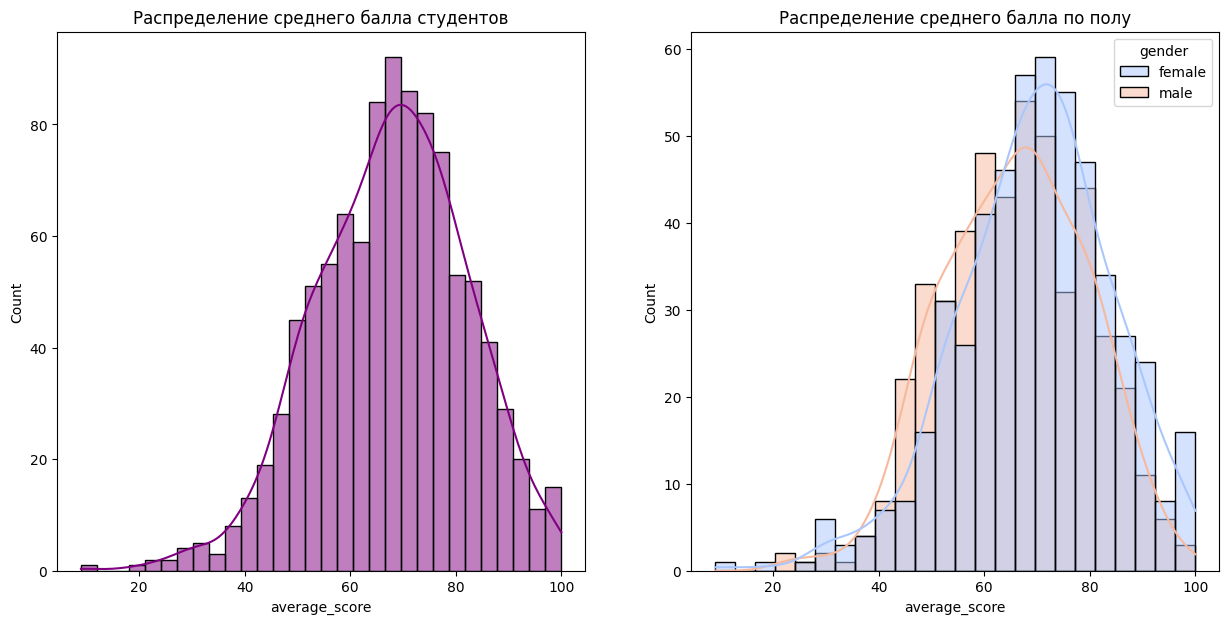

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='purple')
plt.title('Распределение среднего балла студентов')

plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True, hue='gender', palette='coolwarm')
plt.title('Распределение среднего балла по полу')

plt.show()


1. Гистограмма распределения среднего балла показывает, что большинство студентов имеют баллы в диапазоне от 50 до 80, с пиком около 70.
2. Гистограмма распределения среднего балла по полу демонстрирует, что у женщин в среднем более высокие результаты, чем у мужчин.
3. Распределение обоих полов довольно схоже, но женщины в целом имеют более высокие баллы.

C:\Users\Mi\AppData\Local\Temp\ipykernel_12256\3986063499.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\Mi\AppData\Local\Temp\ipykernel_12256\3986063499.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\Mi\AppData\Local\Temp\ipykernel_12256\3986063499.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


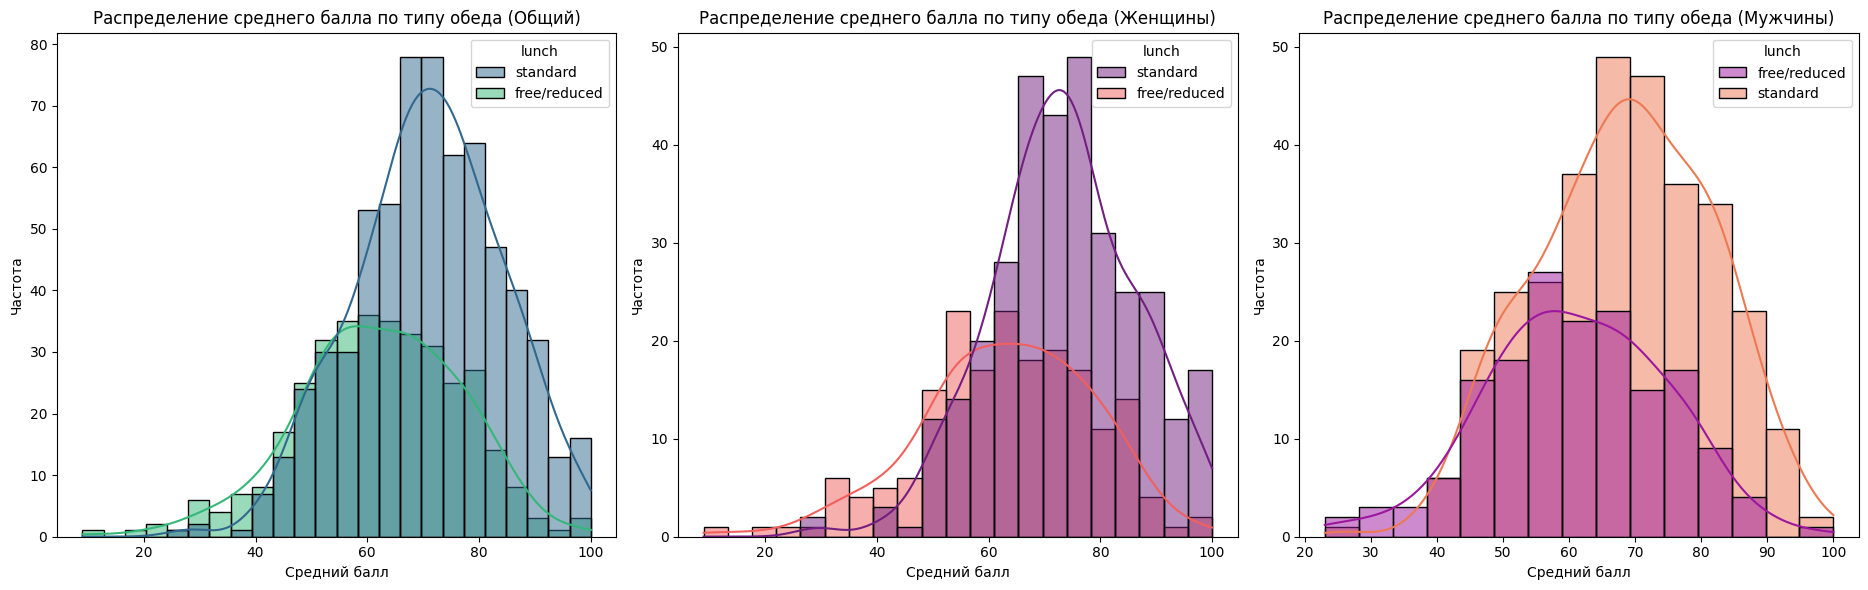

In [ ]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(141)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch', palette='viridis')
plt.title('Распределение среднего балла по типу обеда (Общий)')
plt.xlabel('Средний балл')
plt.ylabel('Частота')

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='lunch', palette='magma')
plt.title('Распределение среднего балла по типу обеда (Женщины)')
plt.xlabel('Средний балл')
plt.ylabel('Частота')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='lunch', palette='plasma')
plt.title('Распределение среднего балла по типу обеда (Мужчины)')
plt.xlabel('Средний балл')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()


## Общий анализ:
**Средний балл по типу обеда**

1. Студенты с типом обеда "standard" в целом имеют более высокие средние баллы (около 70), чем студенты с типом обеда "free/reduced" (около 62).
2. У студентов с типом обеда "standard" баллы более равномерные, с меньшими колебаниями (меньше стандартное отклонение), в то время как у студентов с "free/reduced" результат может сильно различаться.

**Разница между мужчинами и женщинами**

1. Женщины в обеих группах ("standard" и "free/reduced") показывают более высокие средние баллы по сравнению с мужчинами.
2. У женщин с "standard" средний балл — около 73, а у мужчин — около 68. То же самое наблюдается в группе "free/reduced".

**Вывод**

1. Студенты с типом обеда "standard" в целом учатся лучше, чем те, кто получает обед "free/reduced".
2. Женщины показывают более высокие результаты, чем мужчины, как в группе с бесплатным обедом, так и в группе со стандартным обедом.


C:\Users\Mi\AppData\Local\Temp\ipykernel_12256\3641289479.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\Mi\AppData\Local\Temp\ipykernel_12256\3641289479.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\Mi\AppData\Local\Temp\ipykernel_12256\3641289479.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


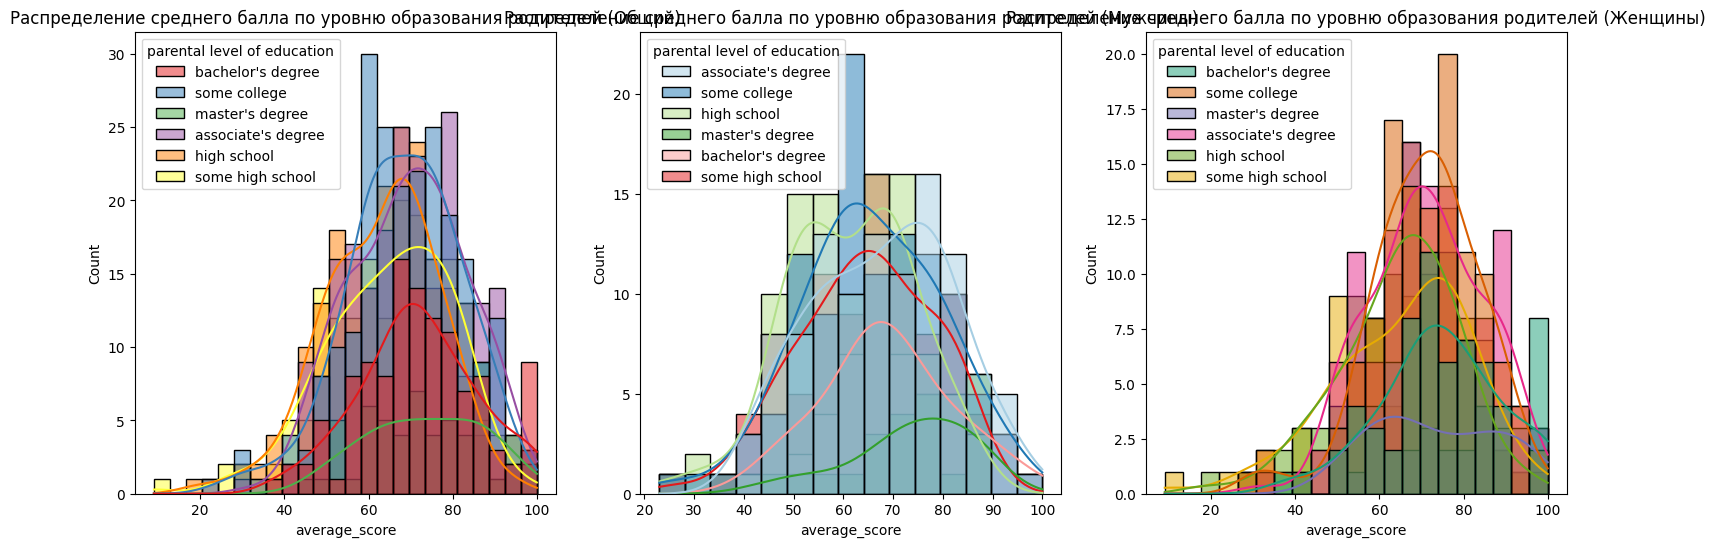

In [ ]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(141)
ax = sns.histplot(data=df, x='average_score', kde=True, hue='parental level of education', palette='Set1')
plt.title('Распределение среднего балла по уровню образования родителей (Общий)')

plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='parental level of education', palette='Paired')
plt.title('Распределение среднего балла по уровню образования родителей (Мужчины)')

plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='parental level of education', palette='Dark2')
plt.title('Распределение среднего балла по уровню образования родителей (Женщины)')

plt.show()


## Общий анализ

**Высшее образование**  

1. У студентов, родители которых имеют высшее образование, как правило, более высокие средние баллы.  
2. Средний балл студентов, у которых родители с `bachelor's degree` и `master's degree`, выше, чем у студентов с другими уровнями образования. Студенты, чьи родители имеют степень `master's degree`, показывают в среднем самый высокий балл (около `73.6`).  
`Associate's degree` также демонстрирует высокие результаты со средним баллом около `69.5`.

**Среднее образование**  

1. Студенты, чьи родители окончили только среднюю школу, показывают более низкие средние баллы по сравнению с другими группами.  
2. Средний балл для студентов, чьи родители имеют только среднее образование, составляет около `63.1`, что ниже по сравнению с семьями с высшим образованием.  
3. У мужчин этот показатель еще ниже — около `61.6`, в то время как у женщин он чуть выше (`64.7`).  

**Неполное высшее образование**  

1. Студенты, чьи родители имеют неполное высшее образование, показывают средние баллы в пределах среднего уровня.  
Средний балл для группы `some college` составляет около `68.5` в целом, и почти `71` у женщин.  
2. У группы `some high school` средний балл варьируется от `65` до `66`, что также соответствует среднему уровню успеваемости.  


## Выводы

1. Образование родителей имеет значительное влияние на результаты студентов. Студенты с более высоким уровнем образования родителей (bachelor's, master's degree) имеют более высокие средние баллы по сравнению с теми, чьи родители закончили только школу или имеют неполное высшее образование.

2. Мужчины и женщины в целом показывают схожие результаты, но в некоторых группах, например, среди студентов с высшим образованием, средний балл у женщин немного выше, чем у мужчин.


## Максимально высокий балл за каждый предмет

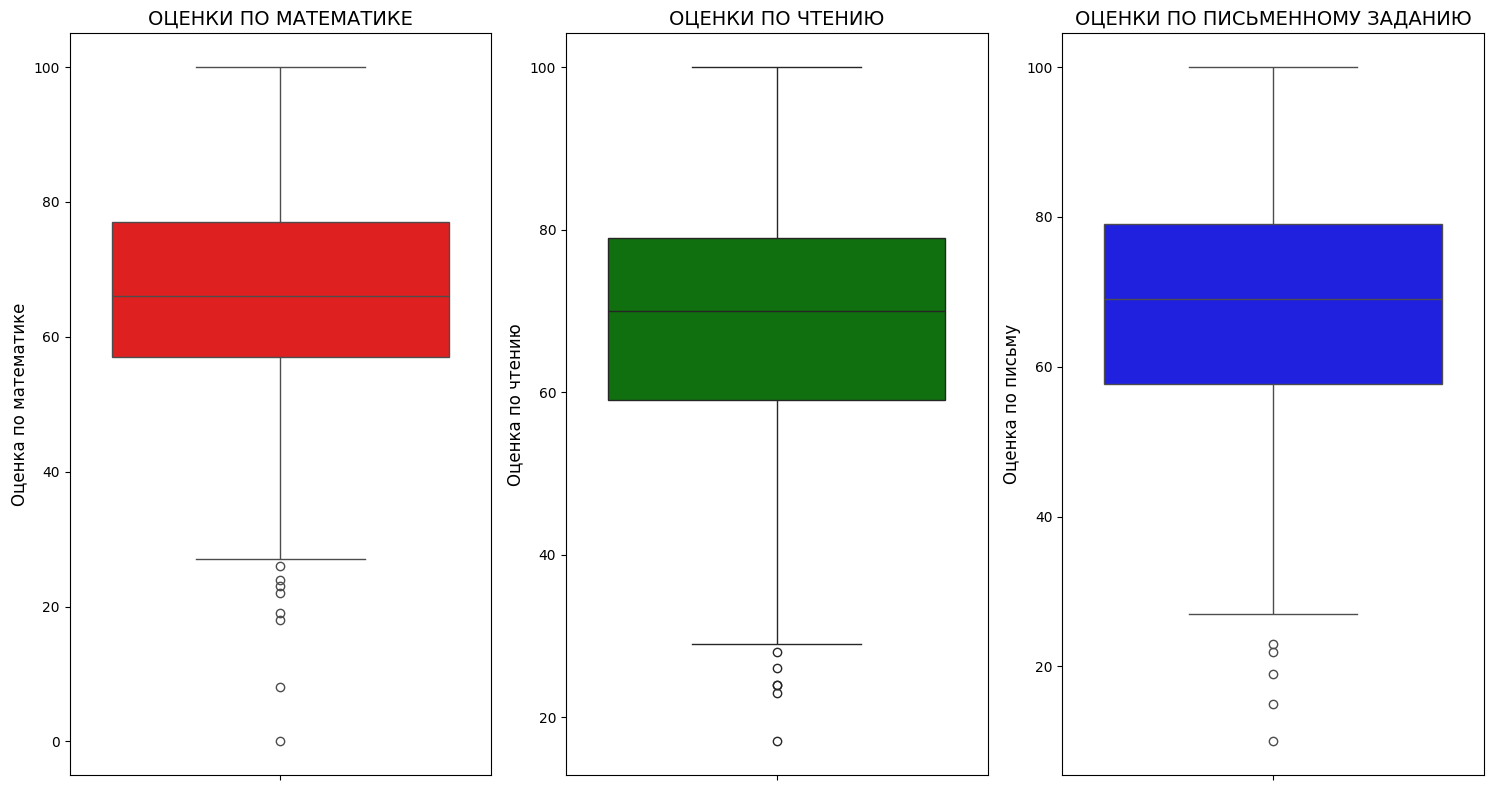

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 4, 1)
plt.title('ОЦЕНКИ ПО МАТЕМАТИКЕ', fontsize=14)
sns.boxplot(y='math score', data=df, color='red')
plt.ylabel('Оценка по математике', fontsize=12)

plt.subplot(1, 4, 2)
plt.title('ОЦЕНКИ ПО ЧТЕНИЮ', fontsize=14)
sns.boxplot(y='reading score', data=df, color='green')
plt.ylabel('Оценка по чтению', fontsize=12)

plt.subplot(1, 4, 3)
plt.title('ОЦЕНКИ ПО ПИСЬМЕННОМУ ЗАДАНИЮ', fontsize=14)
sns.boxplot(y='writing score', data=df, color='blue')
plt.ylabel('Оценка по письму', fontsize=12)

plt.tight_layout()
plt.show()


**Математика**
Средний балл — 66.1, но разброс достаточно большой (стандартное отклонение 15.16). Минимальный балл — 0, максимальный — 100. Половина учеников набрала от 57 до 77 баллов. Это показывает, что у некоторых студентов могут быть серьёзные трудности с предметом, но в целом результаты неплохие.

**Чтение**
Средний балл выше, чем по математике — 69.2, с меньшим разбросом (14.6). Минимум — 17, максимум — 100. Половина учеников набрала от 59 до 79 баллов. Видно, что с чтением у большинства студентов дела обстоят лучше, чем с математикой.

**Письмо**
Средний балл — 68.05, стандартное отклонение тоже умеренное. Минимальный балл не указан полностью, но максимум — 100, а 75% учеников набрали до 79 баллов. Это говорит о том, что навыки письма у учеников примерно на уровне навыков чтения.

## Многомерный анализ с использованием круговой диаграммы

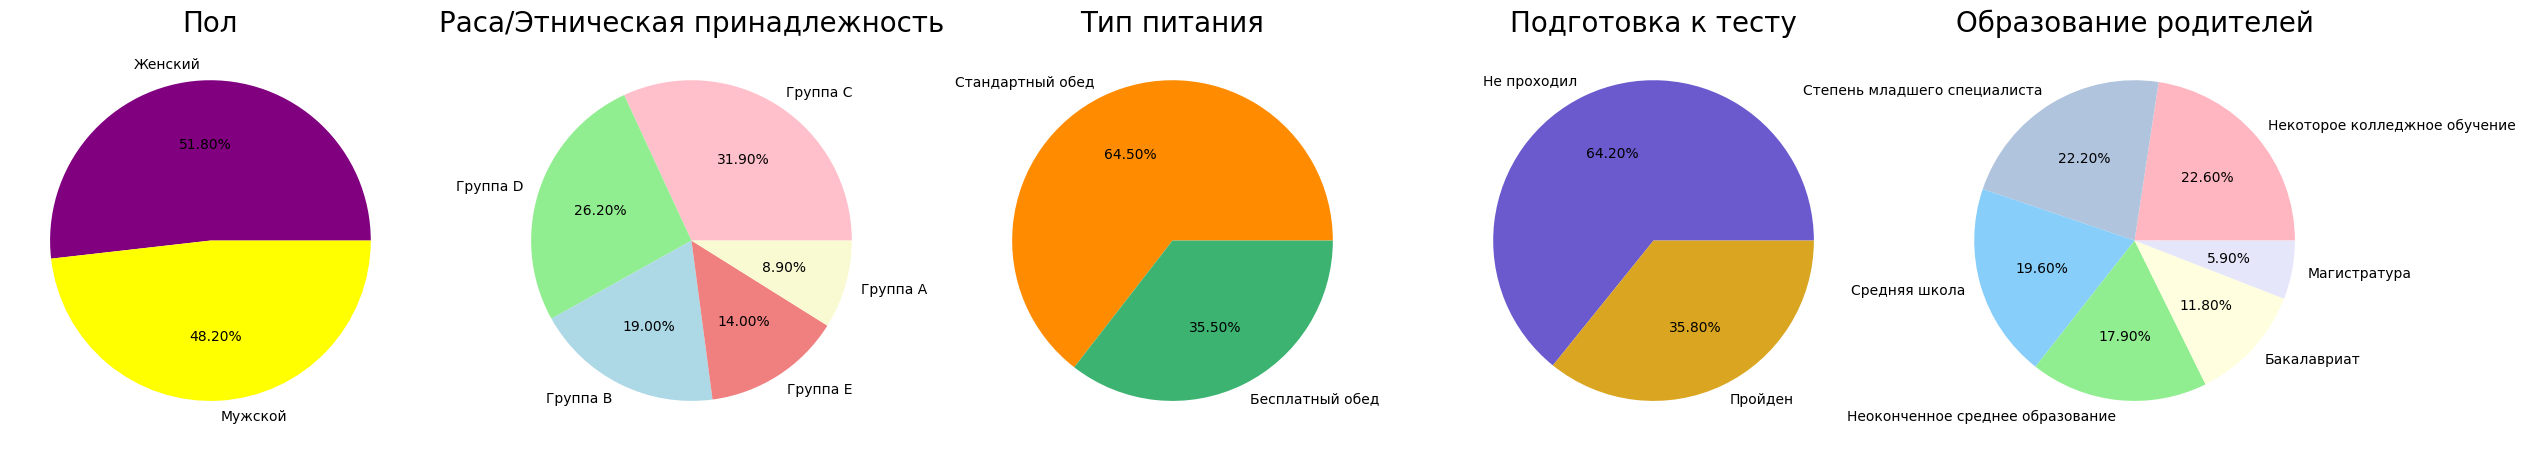

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = ['Женский', 'Мужской']
color = ['purple', 'yellow']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Пол', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = ['Группа C', 'Группа D', 'Группа B', 'Группа E', 'Группа A']
color = ['pink', 'lightgreen', 'lightblue', 'lightcoral', 'lightgoldenrodyellow']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Раса/Этническая принадлежность', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = ['Стандартный обед', 'Бесплатный обед']
color = ['darkorange', 'mediumseagreen']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Тип питания', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = ['Не проходил', 'Пройден']
color = ['slateblue', 'goldenrod']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Подготовка к тесту', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = ['Некоторое колледжное обучение', "Степень младшего специалиста",
          'Средняя школа', 'Неоконченное среднее образование',
          "Бакалавриат", "Магистратура"]
color = ['lightpink', 'lightsteelblue', 'lightskyblue', 'lightgreen', 'lightyellow', 'lavender']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Образование родителей', fontsize=20)
plt.axis('off')

plt.grid()
plt.show()


Из данных видно, что социально-экономические факторы (питание, образование родителей) и подготовка к экзаменам могут играть важную роль в успехах учеников.

## Многомерный анализ с использованием Pairplot

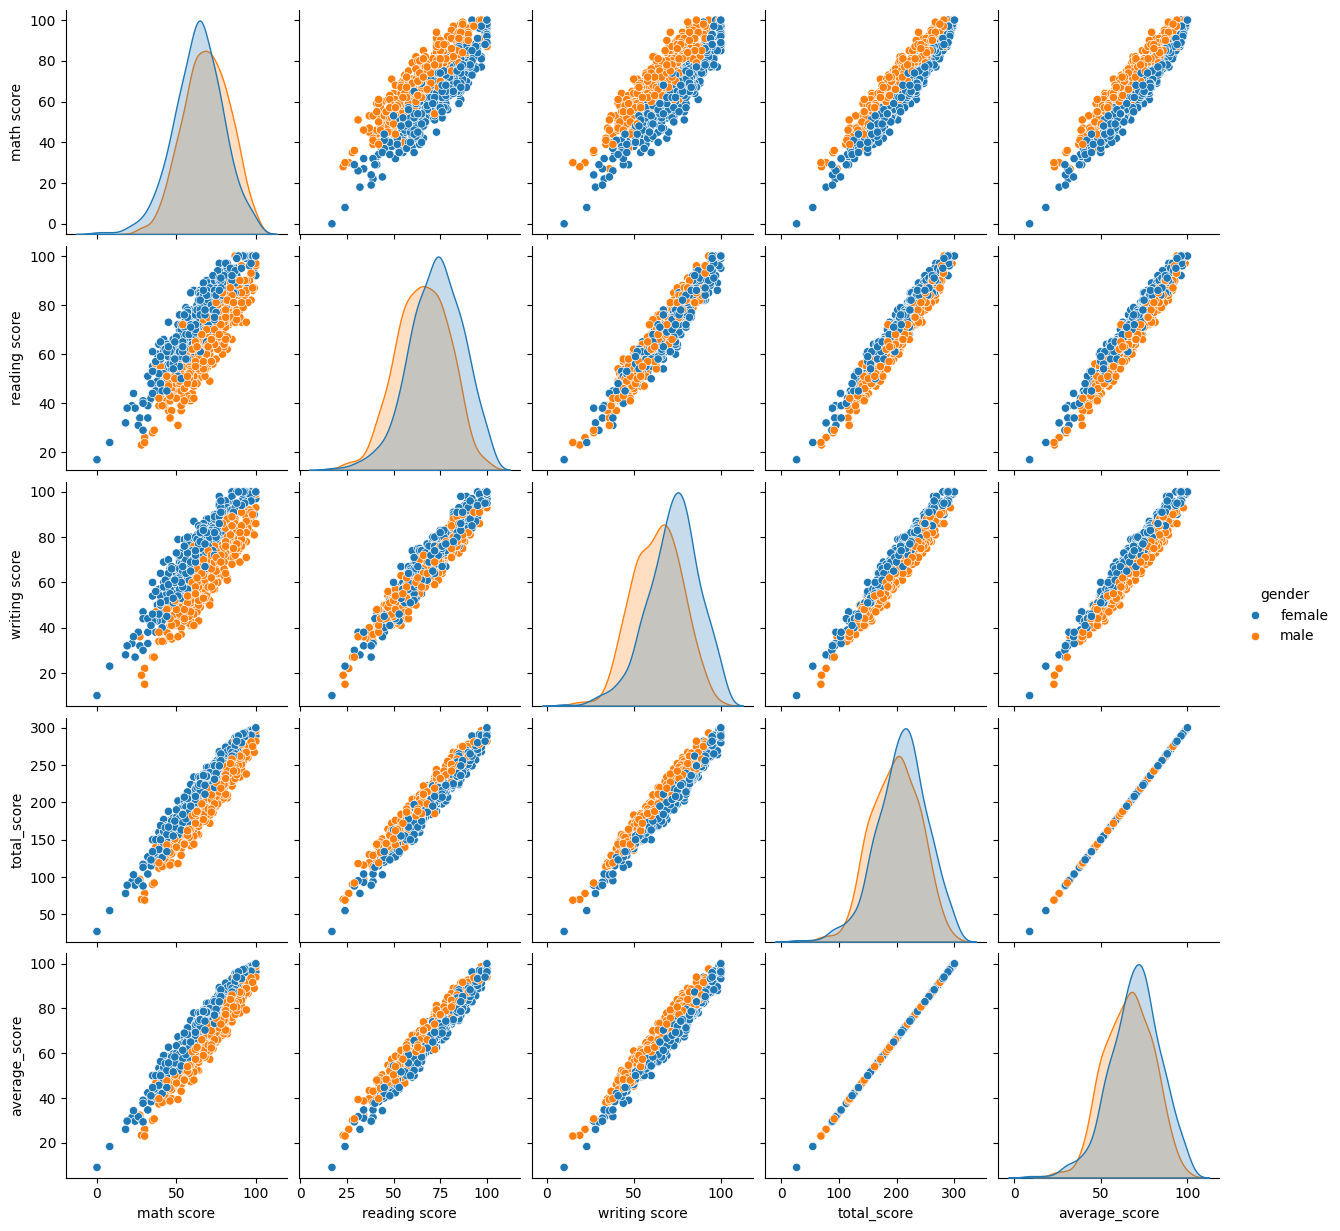

In [ ]:
sns.pairplot(df,hue = 'gender')
plt.show()

Из приведенного графика видно, что все оценки линейно возрастают друг с другом.

## Влияет ли раса/этничность на успеваемость студентов?

C:\Users\Mi\AppData\Local\Temp\ipykernel_12256\3393926765.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['race/ethnicity'], data=df, palette='muted', ax=ax[0], saturation=0.95)


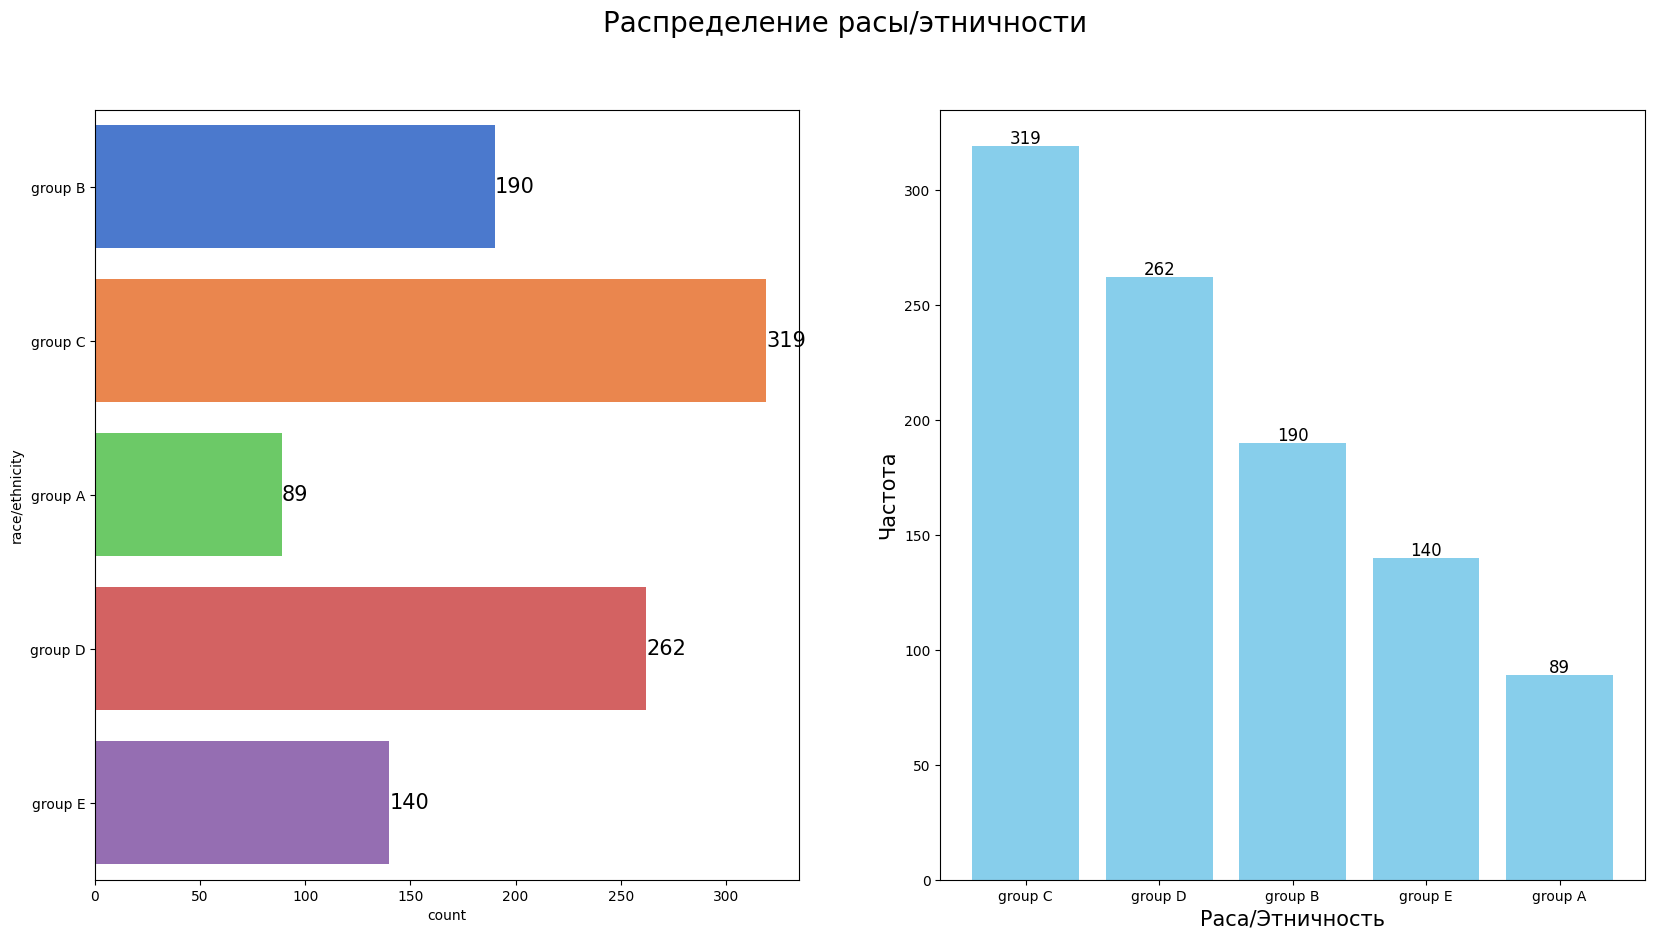

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(y=df['race/ethnicity'], data=df, palette='muted', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)
ax[1].bar(df['race/ethnicity'].value_counts().index, df['race/ethnicity'].value_counts(), color='skyblue')
ax[1].set_xlabel('Раса/Этничность', fontsize=15)
ax[1].set_ylabel('Частота', fontsize=15)
for i, v in enumerate(df['race/ethnicity'].value_counts()):
    ax[1].text(i, v + 1, str(v), color='black', ha='center', fontsize=12)

plt.suptitle('Распределение расы/этничности', fontsize=20)

plt.show()


1. Большинство студентов принадлежат к группе C / группе D.
2. Наименьшее количество студентов принадлежит группе A.

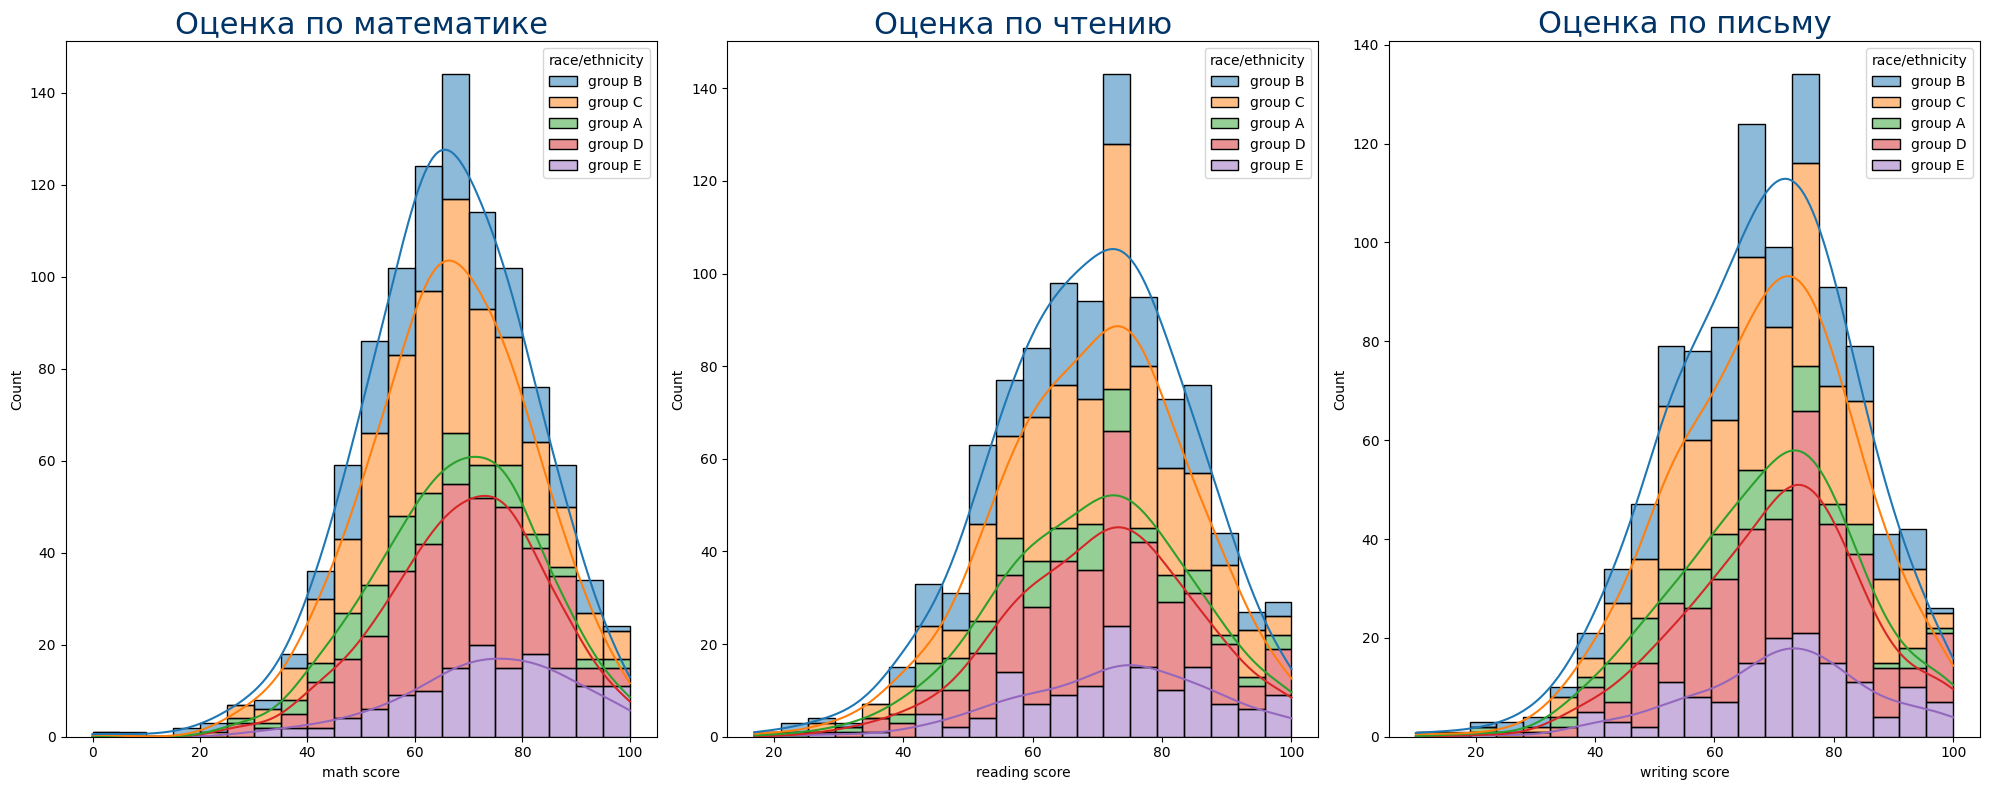

In [ ]:
Group_data2 = df.groupby('race/ethnicity')

f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.histplot(data=df, x='math score', hue='race/ethnicity', kde=True, multiple="stack", ax=ax[0], bins=20)
ax[0].set_title('Оценка по математике', color='#003366', size=22)

sns.histplot(data=df, x='reading score', hue='race/ethnicity', kde=True, multiple="stack", ax=ax[1], bins=20)
ax[1].set_title('Оценка по чтению', color='#003366', size=22)

sns.histplot(data=df, x='writing score', hue='race/ethnicity', kde=True, multiple="stack", ax=ax[2], bins=20)
ax[2].set_title('Оценка по письму', color='#003366', size=22)

plt.tight_layout()

plt.show()


1. **Математика:** Студенты из группы E имеют наивысший средний балл (73.82), а из группы A — наименьший (61.63).
2. **Чтение:** Группа E также лидирует по чтению (73.03), в то время как группа A имеет самый низкий средний балл (64.67).
3. **Письмо:** Группа E имеет наивысший средний балл (71.41), а группа A — самый низкий (62.67).

**Вывод:** Студенты из группы E показывают лучшие результаты по всем предметам, в то время как группа A имеет наименьшие средние баллы.

## Взаимосвязь факторов образования и питания с успеваемостью студентов

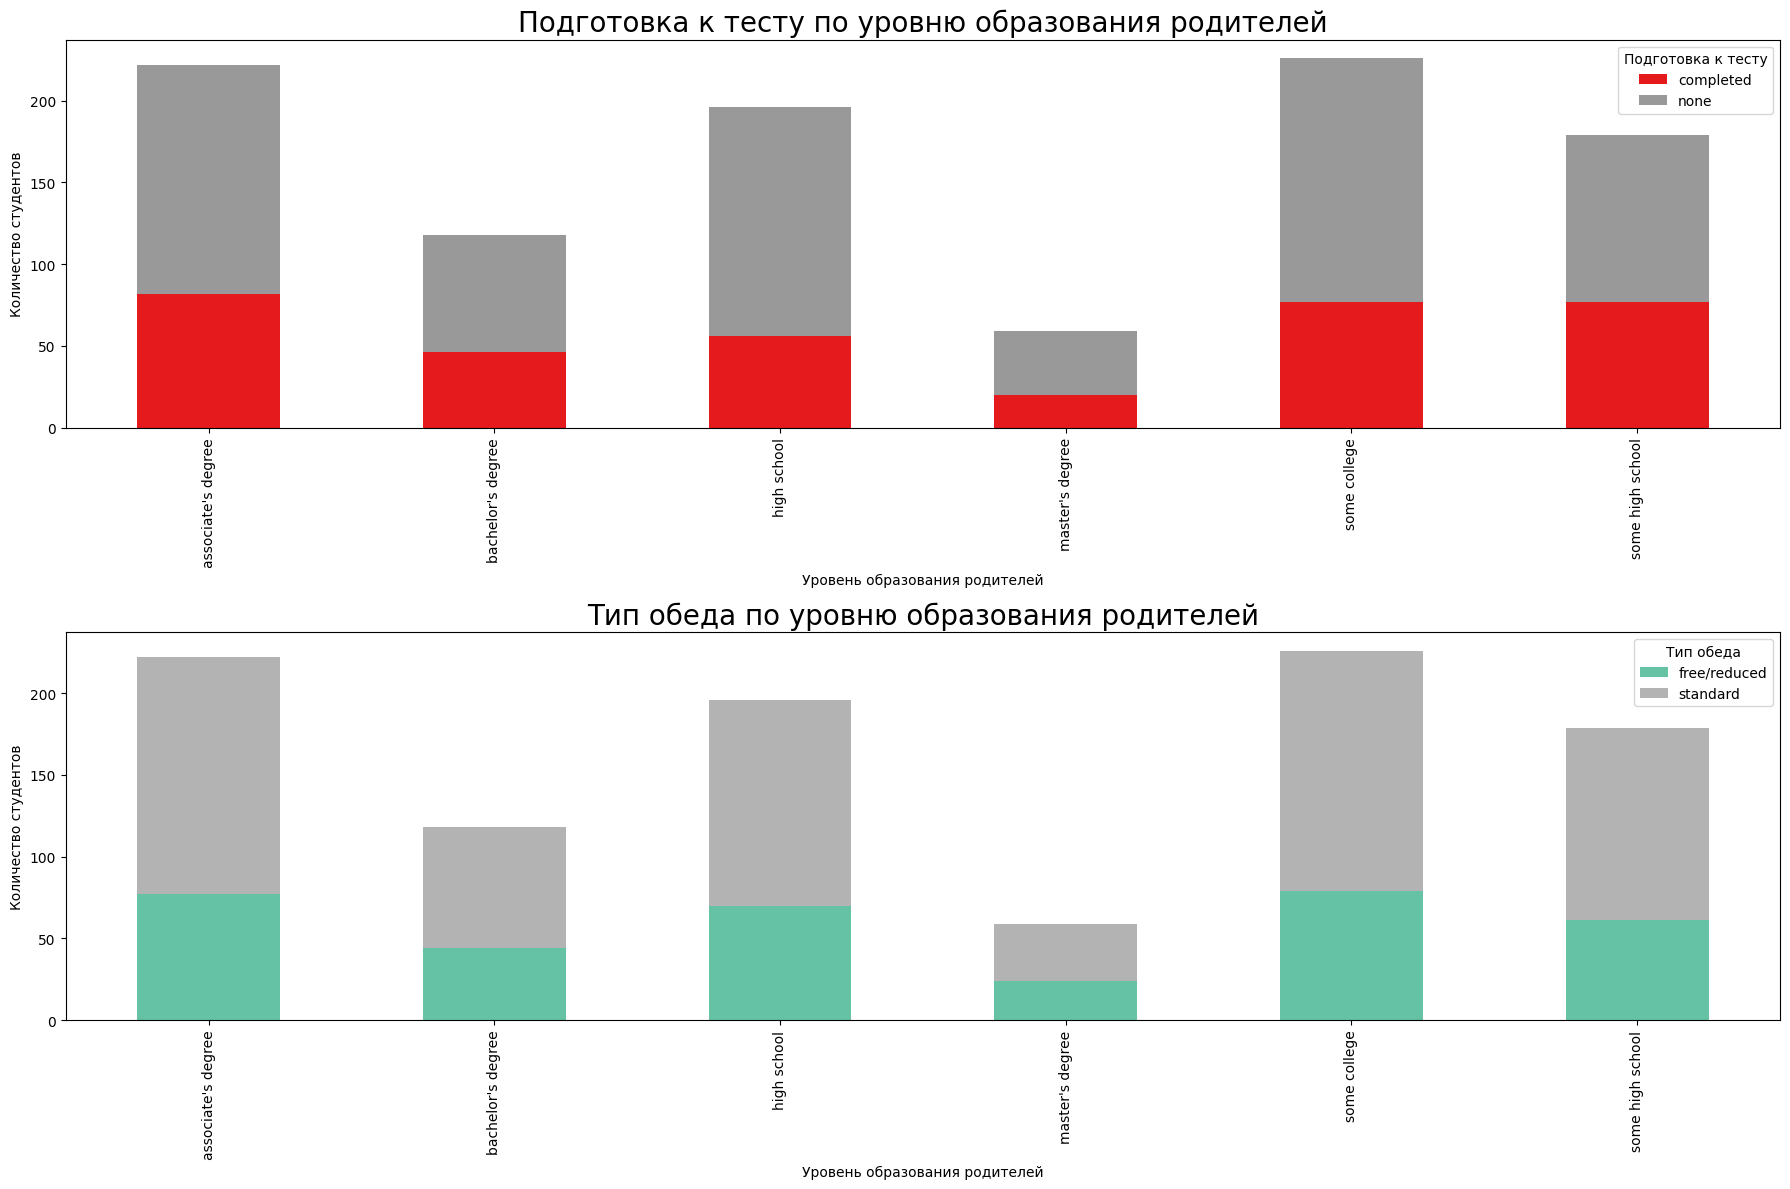

In [ ]:
f, ax = plt.subplots(2, 1, figsize=(18, 12))
parent_test_prep = df.groupby(['parental level of education', 'test preparation course']).size().unstack(fill_value=0)

parent_test_prep.plot(kind='bar', stacked=True, colormap='Set1', ax=ax[0])
ax[0].set_title('Подготовка к тесту по уровню образования родителей', color='black', size=20)
ax[0].set_xlabel('Уровень образования родителей')
ax[0].set_ylabel('Количество студентов')
ax[0].legend(title='Подготовка к тесту')

parent_lunch = df.groupby(['parental level of education', 'lunch']).size().unstack(fill_value=0)

parent_lunch.plot(kind='bar', stacked=True, colormap='Set2', ax=ax[1])
ax[1].set_title('Тип обеда по уровню образования родителей', color='black', size=20)
ax[1].set_xlabel('Уровень образования родителей')
ax[1].set_ylabel('Количество студентов')
ax[1].legend(title='Тип обеда')

plt.tight_layout()
plt.show()


1. Подготовка к тесту и образование родителей

У студентов, чьи родители имеют более высокий уровень образования, доля тех, кто прошёл подготовку к тесту, ниже по сравнению с менее образованными родителями.
Вероятно, студенты с более образованными родителями могут получать больше поддержки дома, поэтому реже записываются на подготовку к тесту.

2. Тип обеда и образование родителей

Чем выше уровень образования родителей, тем меньше студентов, получающих льготное или бесплатное питание.
Это может свидетельствовать о более высокой финансовой стабильности семей с высоким уровнем образования.


## Карта корреляции

Сделаем копию датафрейма, перекодируем категориальные переменные, и построим карту корреляции, чтобы посмотреть зависимости.

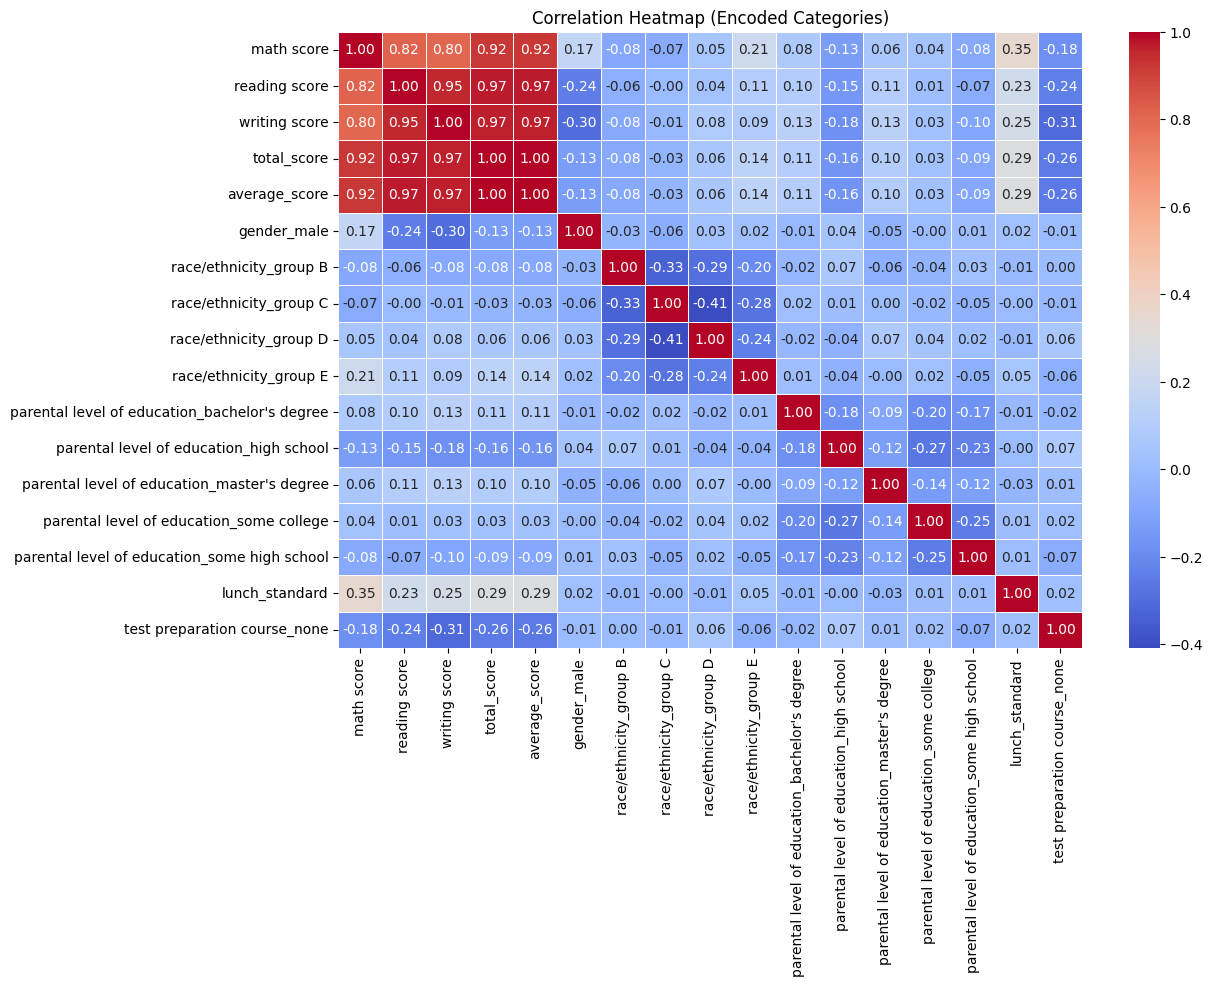

,math score,reading score,writing score,total_score,average_score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
math score,1.000000,0.817580,0.802642,0.918746,0.918746,0.167982,-0.084250,-0.073387,0.050071,0.205855,0.079664,-0.128725,0.060417,0.037056,-0.079852,0.350877,-0.177702
reading score,0.817580,1.000000,0.954598,0.970331,0.970331,-0.244313,-0.060283,-0.003074,0.035177,0.106712,0.096024,-0.151068,0.106452,0.010782,-0.071369,0.229560,-0.241780
writing score,0.802642,0.954598,1.000000,0.965667,0.965667,-0.301225,-0.078254,-0.010203,0.082032,0.089077,0.128297,-0.182211,0.125693,0.027989,-0.097326,0.245769,-0.312946
total_score,0.918746,0.970331,0.965667,1.000000,1.000000,-0.130861,-0.078247,-0.030691,0.058902,0.141050,0.106599,-0.161936,0.102411,0.026761,-0.087247,0.290064,-0.256710
average_score,0.918746,0.970331,0.965667,1.000000,1.000000,-0.130861,-0.078247,-0.030691,0.058902,0.141050,0.106599,-0.161936,0.102411,0.026761,-0.087247,0.290064,-0.256710
gender_male,0.167982,-0.244313,-0.301225,-0.130861,-0.130861,1.000000,-0.028466,-0.063368,0.030566,0.020302,-0.011638,0.037952,-0.046188,-0.004460,0.008990,0.021372,-0.006028
race/ethnicity_group B,-0.084250,-0.060283,-0.078254,-0.078247,-0.078247,-0.028466,1.000000,-0.331479,-0.288574,-0.195411,-0.019121,0.069093,-0.056363,-0.036203,0.026531,-0.008257,0.000106
race/ethnicity_group C,-0.073387,-0.003074,-0.010203,-0.030691,-0.030691,-0.063368,-0.331479,1.000000,-0.407797,-0.276145,0.015682,0.007977,0.001630,-0.015872,-0.045339,-0.003385,-0.012522
race/ethnicity_group D,0.050071,0.035177,0.082032,0.058902,0.058902,0.030566,-0.288574,-0.407797,1.000000,-0.240402,-0.020556,-0.042118,0.072793,0.042347,0.018402,-0.009458,0.055956
race/ethnicity_group E,0.205855,0.106712,0.089077,0.141050,0.141050,0.020302,-0.195411,-0.276145,-0.240402,1.000000,0.013221,-0.039494,-0.003180,0.023153,-0.053075,0.052398,-0.059393


In [ ]:
df_copy = df.copy()
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

df_encoded = pd.get_dummies(df_copy, columns=categorical_cols, drop_first=True)

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Encoded Categories)')
plt.show()
correlation_matrix = df_encoded.corr()
correlation_matrix

Из карты корреляции можно сделать несколько интересных выводов:

1. Влияние пола на успеваемость

Небольшая положительная корреляция между полом (мужчина = 1) и математическим баллом (~0.17), но отрицательная — с чтением и письмом (-0.24 и -0.3). Это может указывать на то, что мальчики чуть лучше в математике, а девочки — в гуманитарных предметах.

2. Этническая принадлежность

Группы C и D имеют слабую положительную корреляцию с оценками, а группы A и B — отрицательную.

3. Образование родителей

Высшее образование родителей (бакалавр, магистр) слабо положительно коррелирует с оценками, а низкий уровень (незаконченное среднее) — отрицательно. Это может свидетельствовать о влиянии образовательной среды дома.

4. Тип питания:

Студенты с обычным обедом ("standard lunch") показывают более высокие результаты по всем предметам (корреляция ~0.3). Возможно, это связано с лучшей питательной поддержкой и энергией на экзамене.

5. Подготовительный курс:

Завершение курса подготовки положительно связано с баллами (~0.2–0.3), что подтверждает эффективность дополнительной подготовки к тестам.

## Регрессионный анализ

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
X = df_encoded.drop(['math score', 'reading score', 'writing score', 'total_score'], axis=1)
y = df_encoded['total_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Квадрат ошибки  (MSE):", mse)
print("R²:", r2)

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))


Квадрат ошибки  (MSE): 7.402039645869798e-28
R²: 1.0
                                          Feature   Coefficient
0                                   average_score  3.000000e+00
3                          race/ethnicity_group C  1.792193e-15
5                          race/ethnicity_group E  1.399986e-15
4                          race/ethnicity_group D  1.202226e-15
2                          race/ethnicity_group B  4.312863e-16
12                   test preparation course_none  3.875742e-16
10   parental level of education_some high school  1.121103e-16
1                                     gender_male -5.725339e-18
11                                 lunch_standard -3.224619e-16
8     parental level of education_master's degree -1.163886e-15
9        parental level of education_some college -1.513306e-15
7         parental level of education_high school -1.928653e-15
6   parental level of education_bachelor's degree -2.639443e-15


Регрессионный анализ подтвердил, что образовательные ресурсы семьи (уровень образования родителей) и дополнительные занятия (подготовительные курсы) положительно влияют на успеваемость. Тип питания и принадлежность к социальной группе также могут отражать социально-экономические факторы, которые стоит учитывать при разработке образовательных программ.

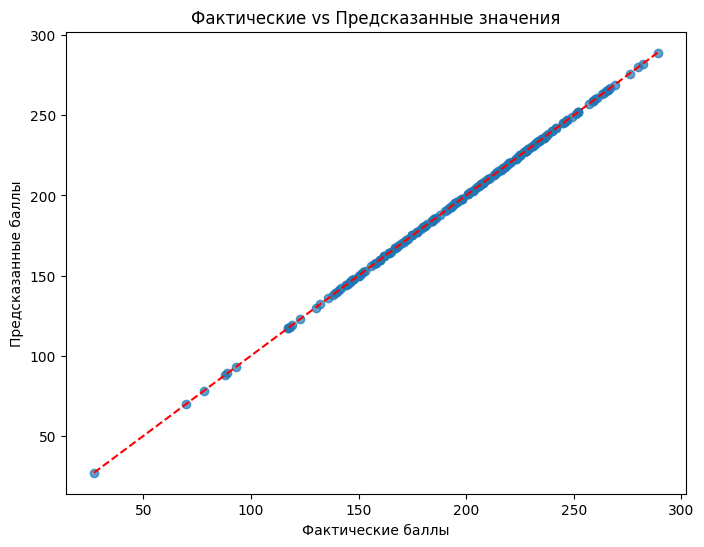

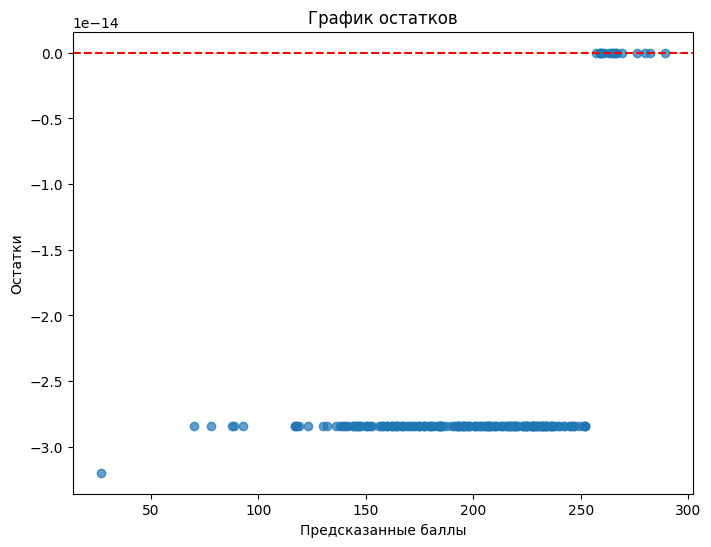

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Фактические vs Предсказанные значения')
plt.xlabel('Фактические баллы')
plt.ylabel('Предсказанные баллы')
plt.show()
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('График остатков')
plt.xlabel('Предсказанные баллы')
plt.ylabel('Остатки')
plt.show()

## Итоги работы

Успеваемость студентов коррелирует с такими факторами, как обед, раса и уровень образования родителей.
Девочки имеют более высокий процент успешной сдачи и чаще достигают высоких баллов.
Успеваемость студентов не показывает сильной корреляции с прохождением подготовительного курса.
Однако прохождение подготовительного курса оказалось полезным.